<h1>Cálculo numérico del grado<h1>

Sea $g:\mathbb T\to \mathbb R$ una función de clase $C^2$, $P:L^2(\mathbb T)\to \langle \sin(mt), \cos(mt)\rangle$ la proyección ortogonal sobre $\langle \sin(mt), \cos(mt)\rangle$ y $p$ una función continua y $2\pi$-periódica. El operador de Nemitsky $\mathcal N$ está definido por $\mathcal Nu(t)=p(t)-g(u(t-\tau))$ y estamos interesados en calcular $deg \Gamma$ donde $\Gamma=P\mathcal N$ definida en una bola grande de $\langle \sin(mt), \cos(mt)\rangle$ en  $\langle \sin(mt), \cos(mt)\rangle$ 

*La siguiente celda llama las librerías básicas*

In [4]:
#gráficos en línea
%matplotlib inline
#librería de gráficas
import matplotlib.pyplot as plt
#librería de manipulación numérica
import numpy as np
#integración numérica
from scipy.integrate import quad
#procedimiento para encontrar raices
from scipy import optimize

*Definición de $g$, $m$ y $\tau$*

In [15]:
def g(x):
    return np.arctan(x)
m = 1
τ = 1.5

*De la función $p$ solo nos interesa su componente en el núcleo a la que llamamos $Pp$ y por lazer leach sabemos que no puede ser muy grnde*

In [10]:
Pp = np.array([0, 0.2])

*Definición de la función proyección $P$ evaluada en una función $f$*

In [11]:
def P(f):
    am = quad(lambda t: (1/np.pi)*np.cos(m*t)*f(t), 0, 2*np.pi)[0]
    bm = quad(lambda t: (1/np.pi)*np.sin(m*t)*f(t), 0, 2*np.pi)[0]
    return np.array([am, bm])

*Definición de la función $\Gamma$ a la que le calcularemos el grado*

In [16]:
def  Γ(x):
    return  Pp - P(lambda t: g(x[0]*np.cos(t- τ) + x[1]*np.sin(t- τ)))

*Par determinar el número de ceros y su ubicación aproximada lo vamos a realizar heurísticamente mediante una gráfica. <font color='red'>Es aquí donde no sé como proceder en $\mathbb R^4$. Se me ocurre hacer una malla de dimensión 4 y ver donde el radio es muy pequeño pero me parece un procedimiento muy heurístico e ineficiente</font>* 

In [17]:
x = np.linspace(-20,20)
y = np.linspace(-20,20)
xx, yy = np.meshgrid(x, y)
zz = np.empty([len(y),len(x)])
for j in range(len(y)):
    for i in range(len(x)):
        zz[j, i] = Γ([xx[j, i],yy[j, i]])[0]**2 + Γ([xx[j, i],yy[j, i]])[1]**2

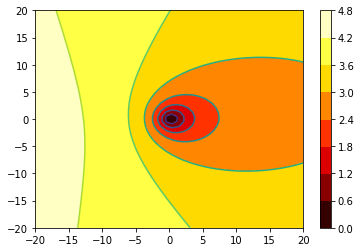

In [18]:
cmap = plt.cm.get_cmap("hot")
fig, ax = plt.subplots()
cs = ax.contourf(xx, yy, zz, cmap=cmap)
#levels = [0,1e-2,1e-1,0.5,0.8,1,2,3,4,5,6]
fig.colorbar(cs, ax=ax)
ax.contour(xx, yy, zz)

*Aquí se da uno cuenta que la función parece tener un único cero y se puede calcular "a la de Dios". <font color='red'>No pude dar con funciones $g$ que me dieran más de un cero. Si la componente en el núcleo de $p$, llamada $Pp$ pasa la constante de Lazer-Leach no me aparecen ceros</font>* 

*En esta celda encontramos el cero*

In [20]:
sol = optimize.root(Γ, [-5,0])
sol

    fjac: array([[-0.11970578, -0.99280941],
       [ 0.99280941, -0.11970578]])
     fun: array([-1.03593811e-15, -1.77635684e-15])
 message: 'The solution converged.'
    nfev: 19
     qtf: array([-1.03060570e-11,  4.46360073e-12])
       r: array([1.07638496, 0.17224077, 0.89234766])
  status: 1
 success: True
       x: array([0.20151414, 0.01429034])

*Definimos la aproximación derivada central para funciones de clase $C^2$ y el Jacobiano*

In [141]:
def c_diff(f, a, h = 1e-2):
    return (1/h)*(f(a + 0.5*h)-f(a-0.5*h))

In [142]:
def jac(f, a, h = 1e-2):
    f1x = cder(lambda t: f([t, a[1]])[0], a[0], h)
    f1y = cder(lambda t: f([a[0], t])[0], a[1], h)
    f2x = cder(lambda t: f([t, a[1]])[1], a[0], h)
    f2y = cder(lambda t: f([a[0], t])[1], a[1], h)
    return np.matrix([[f1x, f1y],[f2x, f2y]])

*El grado da 1*

In [144]:
np.sign(np.linalg.det(jac(PN, sol)))

1.0